In [51]:
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

from PIL import Image
import numpy as np

plot_data = {}

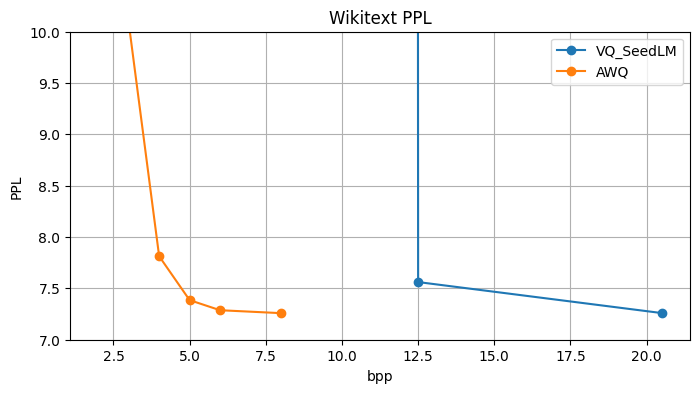

In [6]:
import matplotlib.pyplot as plt

# 데이터 정의
plots = {}
plots['VQ_SeedLM'] = {}
plots['AWQ'] = {}

plots['VQ_SeedLM']['bpp'] = [6, 6.25, 12.5, 20.5]
plots['VQ_SeedLM']['ppl'] = [6919, 3015, 7.5616, 7.2595]

plots['AWQ']['bpp'] = [8, 6, 5, 4, 3, 2]
plots['AWQ']['ppl'] = [7.2588, 7.2873, 7.3857, 7.8133, 10.0885, 54668358]

# 그래프 생성
plt.figure(figsize=(8, 4))
for k, v in plots.items():
    plt.plot(v['bpp'], v['ppl'], marker='o', linestyle='-', label=k)

# 축 레이블 및 제목 설정
plt.xlabel('bpp')
plt.ylabel('PPL')
plt.title('Wikitext PPL')
plt.grid(True)
plt.ylim(7, 10)
plt.legend()

# 그래프 출력
plt.show()
